# Очистка и подготовка данных

Спикер: Андрей Рысистов

Контакты(телеграм): @Rysistov

Слак: @Андрей Рысистов(эксперт)

## <center> 0. План занятия

1. Поговорим о том, что вообще очистка данных и зачем она нужна. Обсудим, с какими проблемами в данных мы можем столкнуться
2. Познакомимся с датасетом, с которым будем сегодня работать
3. Научимся заполнять пропуски в данных
4. Изучим основные методы борьбы с выбросами

## <center> 1. Виды проблемных данных

Данные не всегда представляют собой идеально организованный набор наблюдений без каких-либо пропусков или аномалий Обычно данные содержат в себе кучу мусора, который необходимо почистить, да и вообще сами данные порой лучше воспринимать критически, для того чтобы затем привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.

Давайте рассмотрим типичные проблемы с данными:

    1. Пропущенные значения в данных
    2. Выбросы в данных
    3. Неструктурированные, разбросанные по разным источникам данные
    4. Недостаток информации

## <center> 2. Знакомимся с данными



Работать сегодня будет с датасетом о ценах на дома в Мельбурне. Источник данных: https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/home

In [ ]:
#pip install plotly==5.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.9 MB 1.6 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
#импортируем необходимые модули
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Посмотрим на данные поближе

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/AndreyRysistov/VebinarDST/main/melb_data.csv')#выгружаем данные
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
data.shape

(13580, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
#переименовываем столбцы, для этого воспользуемся методом rename
data = data.rename(columns={'Bedroom2': 'Bedroom', 'SellerG': 'Seller'})

In [ ]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'Seller',
       'Date', 'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

## <center> 3. Пропущенные значения

Рассмотрим несколько способов обнаружения и визуализации пропущенных значений

Посмотрим на количество пропусков в данных:

In [ ]:
(data.isnull().mean() * 100)

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
Seller            0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bedroom           0.000000
Bathroom          0.000000
Car               0.456554
Landsize          0.000000
BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Lattitude         0.000000
Longtitude        0.000000
Regionname        0.000000
Propertycount     0.000000
dtype: float64

In [ ]:
#в табличном виде
null_data = data.isnull().mean() #считаем процентное соотношение пропусков
null_data = null_data[null_data>0].reset_index() #создаем таблицу о пропусках в столбцах
null_data.columns = ['Column', 'CountOfNaN'] #задаем столбцам имена
null_data['CountOfNaN'] *= 100
null_data = null_data.sort_values(by='CountOfNaN', ascending=False)
display(null_data)

,Column,CountOfNaN
1,BuildingArea,47.496318
2,YearBuilt,39.580265
3,CouncilArea,10.081001
0,Car,0.456554


In [ ]:
#в виде столбчатой диаграммы пропусков
bar_fig = px.bar(
    data_frame=null_data, #DataFrame
    x='Column', #признак по оси абсцисс
    y='CountOfNaN', #числовой признак по оси ординат
    width=500,
    height=300
)
bar_fig.show()

In [ ]:
#в виде тепловой карты пропусков
null_data = data.isnull().sum() #вычисляем суммарное количество пропусков в столбцах
cols = null_data[null_data > 0].index #получаем имена столбцов, где число пропусков >0
fig = px.imshow(    
    data[cols].isnull().astype('int'),
    title='Heatmap of NaN',
    width=500,
    height=300
)
fig.show()

Разберем несколько способов справляться с пропущенными значениями

**3.1. Выкинуть столбцы/строки с пропусками (не самый лучший вариант)**

Для удаления строк и столбцов будем использовать метод dropna(), который позволяет удалять пропуски с тонким подходом к настройке. 

Основные параметры метода:

* axis — ось, по которой производится удаление (по умолчанию 0 — строки).

* how — как производится удаление строк (any — если хотя бы в одном из столбцов есть пропуск, стоит по умолчанию; all — если во всех столбцах есть пропуски). 

* thresh — порог удаления. Определяет минимальное число непустых значений в строке/столбце, при котором она/он сохраняется.

Рекомендация: выбрасывать из DataFrame необходимо столбцы, где пропуски составляют более 30-40% от данных

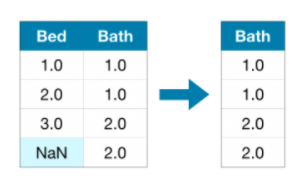

In [ ]:
print('Изначальный размер таблицы:', data.shape) 

Изначальный размер таблицы: (13580, 21)


In [ ]:
drop_data = data.copy() #создаем копию таблицы
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*(1-0.3)
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(how='any', thresh=thresh, axis=1)
#удаляем записи, в которых есть хотя бы 1 пропуск
drop_data = drop_data.dropna(how='any', axis=0)
#отображаем результирующую долю пропусков
print('Результирующее число пропусков в таблице:', drop_data.isnull().mean().sum())
print('Результирующий размер таблицы:', drop_data.shape)
print('Удаленные столбцы:', set(data.columns) - set(drop_data.columns))
print('Число удаленных строк: ', data.shape[0] - drop_data.shape[0])

Результирующее число пропусков в таблице: 0.0
Результирующий размер таблицы: (12211, 19)
Удаленные столбцы: {'BuildingArea', 'YearBuilt'}
Число удаленных строк:  1369


**3.2. Заменить пропущенные значения константой (медианой, модой, средним)**

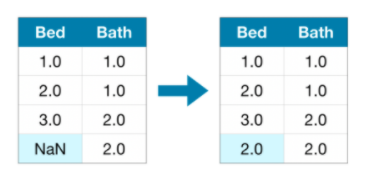

Заполнение значений осуществляется с помощью метода fillna(). Главный параметр метода — value (значение, на которое происходит заполнение данных в столбце). Если метод вызывается от имени всего DataFrame, то в качестве value можно использовать словарь, где ключи — названия столбцов таблицы, а значения словаря — заполняющие константы. 

In [ ]:
inputer_data = data.copy() #создаем копию таблицы
#производим заполнение пропусков
inputer_data = inputer_data.fillna({
    'Car': 0,
    'CouncilArea': 'unknown',
    'YearBuilt': int(inputer_data['YearBuilt'].median()),
    'BuildingArea': inputer_data['BuildingArea'].median()
})
print('Результирующее число пропусков в таблице:', inputer_data.isnull().sum().sum())
#inputer_data.head()

Результирующее число пропусков в таблице: 0


In [ ]:
data.shape

(13580, 21)

**Вопрос:** чем плох такой подход?

In [ ]:
#создаем таблицу из графиков 2х2 - 2 строки, 2 столбца
fig = make_subplots(
    rows=2, 
    cols=2,
) 
#добавляем график в 1ую строку, 1ый столбец таблицы
#на графике отображаем гистограмму признака года построки в логарифмическом масштабе до заполнения
fig.add_trace(
    go.Histogram(x=np.log(data['YearBuilt']), name="YearBuilt before"),
    row=1, col=1
)
#добавляем график в 1ую строку, 2ой столбец таблицы
#на графике отображаем гистограмму признака года построки в логарифмическом масштабе после заполнения
fig.add_trace(
    go.Histogram(x=np.log(inputer_data['YearBuilt']), name="YearBuilt after"),
    row=1, col=2
)
#добавляем график во 2ую строку, 1ый столбец таблицы
#на графике отображаем гистограмму признака площади здания в логарифмическом масштабе до заполнения
fig.add_trace(
    go.Histogram(x=np.log(data['BuildingArea']+1), name="BuildingArea before"),
    row=2, col=1
)
#добавляем график во 2ую строку, 2ой столбец таблицы
#на графике отображаем гистограмму признака площади здания в логарифмическом масштабе после заполнения
fig.add_trace(
    go.Histogram(x=np.log(inputer_data['BuildingArea']+1), name="BuildingArea after"),
    row=2, col=2
)
#обновляем параметры общего графика: высоту, ширину и задаем название 
fig.update_layout(height=600, width=800, title_text="Distributions before and after")
#отображаем результат
fig.show()


**3.3. Заполнение константой по группам**

Более продуманный способ - это заполнять пропуски по группам. Например, 
* заполним пропущенную площадь здания в зависимости от количества комнат в нем; 
* год постройки здания в зависимости от района и типа здания; 
* количество парковочных мест в зависимости количества комнат в здании; 
* наименование регионального правительства в зависимости от района

In [ ]:
data['FullRooms'] = data['Rooms'] + data['Bedroom'] + data['Bathroom']
data.groupby(['FullRooms'])['BuildingArea'].median()

FullRooms
2.0       NaN
3.0      50.0
4.0      68.0
5.0      82.0
6.0     100.5
7.0     118.0
8.0     143.0
9.0     159.0
10.0    192.0
11.0    233.0
12.0    238.0
13.0    274.0
14.0    316.0
15.0    388.5
16.0    373.0
17.0    321.0
18.0    146.0
19.0    101.0
20.0    115.0
21.0    280.0
23.0      NaN
24.0    618.0
Name: BuildingArea, dtype: float64

In [ ]:
data.groupby(['Regionname', 'Type'])['YearBuilt'].agg('median').astype('int64')

Regionname                  Type
Eastern Metropolitan        h       1967
                            t       2004
                            u       1980
Eastern Victoria            h       1980
                            u       2007
Northern Metropolitan       h       1950
                            t       2007
                            u       1993
Northern Victoria           h       1985
South-Eastern Metropolitan  h       1970
                            t       2004
                            u       1980
Southern Metropolitan       h       1940
                            t       2000
                            u       1970
Western Metropolitan        h       1960
                            t       2009
                            u       1980
Western Victoria            h       1980
Name: YearBuilt, dtype: int64

Для заполнения данных описанным способом используется комбинация методов fillna() и transform()

In [ ]:
fill_grouped_data = data.copy() #создаем копию таблицы
#заполняем пропущенную площадь медианной площадью в зависимости от общего количества комнат
fill_grouped_data["BuildingArea"] = fill_grouped_data['BuildingArea'].fillna(
    fill_grouped_data.groupby(['FullRooms', 'Type'])['BuildingArea'].transform('median')
)
#заполняем год постройки здания медианным значением в зависимости от района и типа здания
fill_grouped_data["YearBuilt"] = fill_grouped_data["YearBuilt"].fillna(
    fill_grouped_data.groupby(['Regionname', 'Type'])['YearBuilt'].transform('median').astype('int64')
)
#заполняем количество парковочных мест модальным значением в зависимости от общего количества комнат
fill_grouped_data["Car"] = fill_grouped_data["Car"].fillna(
    fill_grouped_data.groupby(['FullRooms'])['Car'].transform(lambda x: x.mode()[0])
)
#заполняем регионально правильство модальным значением в зависимости от района
fill_grouped_data["CouncilArea"] = fill_grouped_data["CouncilArea"].fillna(
    fill_grouped_data.groupby(['Regionname'])['CouncilArea'].transform(lambda x: x.mode()[0])
)
#оставшиеся пропуски удаляем
fill_grouped_data = fill_grouped_data.dropna()
print('Результирующее число пропусков в таблице:', fill_grouped_data.isna().sum().sum())
print('Результирующий размер таблицы:', fill_grouped_data.shape)
print('Число удаленных строк: ', data.shape[0] - fill_grouped_data.shape[0])

Результирующее число пропусков в таблице: 0
Результирующий размер таблицы: (13573, 22)
Число удаленных строк:  7


Проверяем искажение наших данных в логарифмическом масштабе

In [ ]:
#создаем таблицу из графиков 2х2 - 2 строки, 2 столбца
fig = make_subplots(
    rows=2, 
    cols=2,
) 
#добавляем график в 1ую строку, 1ый столбец таблицы
#на графике отображаем гистограмму признака года построки в логарифмическом масштабе до заполнения
fig.add_trace(
    go.Histogram(x=np.log(data['YearBuilt']), name="YearBuilt before"),
    row=1, col=1
)
#добавляем график в 1ую строку, 2ой столбец таблицы
#на графике отображаем гистограмму признака года построки в логарифмическом масштабе после заполнения
fig.add_trace(
    go.Histogram(x=np.log(fill_grouped_data['YearBuilt']), name="YearBuilt after"),
    row=1, col=2
)
#добавляем график во 2ую строку, 1ый столбец таблицы
#на графике отображаем гистограмму признака площади здания в логарифмическом масштабе до заполнения
fig.add_trace(
    go.Histogram(x=np.log(data['BuildingArea']+1), name="BuildingArea before"),
    row=2, col=1
)
#добавляем график во 2ую строку, 2ой столбец таблицы
#на графике отображаем гистограмму признака площади здания в логарифмическом масштабе после заполнения
fig.add_trace(
    go.Histogram(x=np.log(fill_grouped_data['BuildingArea']+1), name="BuildingArea after"),
    row=2, col=2
)
#обновляем параметры общего графика: высоту, ширину и задаем название 
fig.update_layout(height=600, width=800, title_text="Distributions before and after")
#отображаем результат
fig.show()

Подумайте, как можно уменьшить искажение в случае группировочного заполнения?


In [ ]:
new_data = fill_grouped_data.copy()

Преобразуем наши столбцы в требуемые типы данных

In [ ]:
cols = ['Postcode', 'Bedroom', 'Bathroom', 'Car', 'YearBuilt', 'Propertycount']
for col in cols:
  new_data[col] = new_data[col].astype('int64')
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13573 entries, 0 to 13579
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13573 non-null  object 
 1   Address        13573 non-null  object 
 2   Rooms          13573 non-null  int64  
 3   Type           13573 non-null  object 
 4   Price          13573 non-null  float64
 5   Method         13573 non-null  object 
 6   Seller         13573 non-null  object 
 7   Date           13573 non-null  object 
 8   Distance       13573 non-null  float64
 9   Postcode       13573 non-null  int64  
 10  Bedroom        13573 non-null  int64  
 11  Bathroom       13573 non-null  int64  
 12  Car            13573 non-null  int64  
 13  Landsize       13573 non-null  float64
 14  BuildingArea   13573 non-null  float64
 15  YearBuilt      13573 non-null  int64  
 16  CouncilArea    13573 non-null  object 
 17  Lattitude      13573 non-null  float64
 18  Longti

## <center> 4. Выбросы в данных

**Вопрос:** как вы понимаете термин "выброс"?

Чем опасны выбросы?

Проблема выбросов состоит в том, что они могут «шокировать» модель. 

Чаще всего выбросы либо исключают из данных, либо корректируют значения на что-то правдоподобное, либо, если выбросов много, создают специальный датасет и обучают модели для них отдельно.

Следующим этапом проверим несколько различных столбцов на предмет выбросов. В случае детального анализа это делается с помощью проверки статистических гипотез, но мы попробуем справиться с этим с помощью логики, простых методов статистического анализа и визуализации

In [ ]:
new_data.head(1)

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,FullRooms
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,1,202.0,94.0,1950,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,5.0


### 4.1. Метод логического поиска и щепотки визуализации

In [ ]:
fig = px.histogram(
    data_frame=new_data,
    x='YearBuilt',
    width=800,
    height=300,
    marginal='box',
)
fig.show()

Очень подозрительным кажется дом с годом постройки конца XII века. Если верить википедии, то Мельбурн был заселен в 1835 году, о чем нас и свидетельствуют остальные данные. Посмотрим на него поближе, чтобы удостовериться в том, что это выброс

Очистим данные с помощью ручной фильтрации: выделим из данные только те здания, которые моложе 1835 года

In [ ]:
new_data = new_data[new_data['YearBuilt']>1835]

In [ ]:
fig = px.histogram(
    data_frame=new_data,
    x='YearBuilt',
    width=800,
    height=300,
    marginal='box',
)
fig.show()

In [ ]:
fig = px.histogram(
    data_frame=new_data,
    x='Landsize',
    width=800,
    height=300,
    marginal='box',
)
fig.show()

Подозрительным кажется здание с площадью в 433000 квадратных метров. При стандартном отклонении 4000 квадратных метра и приемлимых ценах оно выбивается из распределения. Посмотрим на него поближе

In [ ]:
new_data['Landsize'].describe()

count     13571.000000
mean        558.366959
std        3991.930599
min           0.000000
25%         177.000000
50%         441.000000
75%         651.000000
max      433014.000000
Name: Landsize, dtype: float64

In [ ]:
new_data[new_data['Landsize']>100e3]

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,FullRooms
11020,Fitzroy,389 Gore St,3,h,2700000.0,VB,Kay,12/08/2017,2.1,3065,...,1,433014.0,159.0,1950,Yarra,-37.79751,144.98309,Northern Metropolitan,5825,9.0


Да. Это определенно какой-то выброс. Здание с такой гигантской площадью стоимостью всего 2.7 миллиона. На всякий случай избавимся от него

In [ ]:
new_data = new_data[new_data['Landsize']<100e3]

In [ ]:
fig = px.histogram(
    data_frame=new_data,
    x='Landsize',
    width=800,
    height=300,
    marginal='box',
)
fig.show()

Гистограмма стала лучше, но стоит дополнительно исследовать данные, чтобы удостовериться в верности домов с площадью территории выше 10к квадратных метров

Вопрос: как вы бы проверили, что все здания действительно находятся в Мельбурне?

In [ ]:
new_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'Seller',
       'Date', 'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'FullRooms'],
      dtype='object')

### 4.2. Метод межквартильного размаха


Алгоритм метода:

→ вычислить 25-ую и 75-ую квантили (первый и третий квартили) — и  для признака, который мы исследуем;

→ вычислить межквартильное расстояние: IQR = Q75-Q25;

→ вычислить верхнюю и нижнюю границы Тьюки: 
$$bound_{upper} = Q75+1.5*IQR$$
$$bound_{lower} = Q25-1.5*IQR$$

→ найти наблюдения, которые выходят за пределы границ.

In [ ]:
new_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'Seller',
       'Date', 'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'FullRooms'],
      dtype='object')

In [ ]:
hist_data = np.log(new_data['BuildingArea']+1).reset_index()
#создаем гистограмму и ящик с усами для площади здания
fig = px.histogram(
    data_frame=hist_data,
    x='BuildingArea',
    width=800,
    height=300,
    marginal='box',
)
fig.show()

In [ ]:
#объявим функцию, которая будет реализовывать метод межквартильного размаха
def outliers_iqr(data, feature, log=False, left=1.5, right=1.5):
    if log:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    #вычисляем 25ую и 75ую квантили (1ый и 3ий квартили)
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75) 
    #вычисляем межквартильное расстояния
    iqr = quartile_3 - quartile_1
    #вычисляем нижнюю и верхнюю границы
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    #определяем выбросы: значения выходящие за пределы границ
    outliers = data[(x<lower_bound) | (x> upper_bound)]
    #задаем очищенные от выбросов данные: значения входящие в границы
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [ ]:
outliers, iqr_data = outliers_iqr(new_data, 'BuildingArea', log=True, left=3, right=3)
print('Количество найденных выбросов:', outliers.shape[0])

Количество найденных выбросов: 104


In [ ]:
hist_data = np.log(iqr_data['BuildingArea']+1).reset_index()
fig = px.histogram(
    data_frame=hist_data,
    x='BuildingArea',
    width=800,
    height=300,
    marginal='box',
)
fig.show()

Вопрос: а какие проверки с данными организовали бы вы сами?

## Спасибо за внимание! Буду рад ответиить на ваши вопросы

Форма ОС:
https://forms.gle/TAeFKkTMpJCT5zc88  
